# Query the API with a user token

In order to access the full functionality of ODA, it is recommended to authenticate to the service.
This will allow the user to receive emails at job completion and to enjoy role privileges like access to
private data or elaboration of many science windows (for collaborators of UNIGE).
Moreover, in case of unexpected issues, the developers will be able to easily join

The first step is obtaining a token.
First, you need to login on the frontend. 
[https://frontend.staging.odahub.io/cdci/astrooda/](https://frontend.staging.odahub.io/cdci/astrooda/)

### Create account

If you do not have an account create one, by clicking where the arrows point.

<img src="Authentication_files/Login_ODA.png">

### login and get API code

Once you login, you should make a quick request, for instance a SPI-ACS lightcurve over a limited time range.
Then click on "API Code" and you will have your corresponding request copied in the clipboard

<img src="Authentication_files/SPI-ACS-example1.png">

## Let's get some logging

In [1]:
import logging
#default
#logging.getLogger().setLevel(logging.WARNING)
#slightly more verbose
#logging.getLogger().setLevel(logging.INFO)
#all messages
logging.getLogger().setLevel(logging.DEBUG)

logging.getLogger('oda_api').addHandler(logging.StreamHandler()) 

In [2]:
import getpass
token = getpass.getpass()

········


## Perform a query through API

Copy the API code in a cell (remove the coockie parameter if present).
This will give you the token identifying you !

Take care of getting products in a variable (here called data_collection)

In [3]:
from oda_api.api import DispatcherAPI

disp = DispatcherAPI(url='http://frontend.staging.internal.odahub.io/cdci/astrooda/dispatch-data')
par_dict = {'src_name': '4U 1700-377', 'RA': '257.815417', 'DEC': '-41.593417', 'T1': '58195.455', 'T2': '58195.555', 'T_format': 'mjd', 'instrument': 'spi_acs', 'product_type': 'Real', 'product': 'spi_acs_lc', 'time_bin': '1', 'user_catalog_file': None}

data_collection = disp.get_product(**par_dict)

 NO custom formatter for instrument mock 
dig_list unable to literal_eval src_name; problem malformed node or string: <_ast.Name object at 0x7fb9a80a5400>
dig_list unable to literal_eval RA; problem malformed node or string: <_ast.Name object at 0x7fb96b8cef70>
dig_list unable to literal_eval DEC; problem malformed node or string: <_ast.Name object at 0x7fb96b8cebb0>
dig_list unable to literal_eval T1; problem malformed node or string: <_ast.Name object at 0x7fb96b8cea90>
dig_list unable to literal_eval T2; problem malformed node or string: <_ast.Name object at 0x7fb96b8ce730>
dig_list unable to literal_eval token; problem malformed node or string: <_ast.Name object at 0x7fb96b8ce0d0>
unable to dig list, instance not a dict by <class 'NoneType'>; object was None
dig_list unable to literal_eval selected_catalog; problem malformed node or string: <_ast.Name object at 0x7fb96b8cefa0>
dig_list unable to literal_eval time_bin; problem malformed node or string: <_ast.Name object at 0x7fb96b8

## Show data and plot

In [4]:
data_collection.show()

ID=0 prod_name=spi_acs_lc_0_query  meta_data: {'src_name': 'query', 'time_bin': 1.0, 'time': 'TIME', 'rate': 'RATE', 'rate_err': 'ERROR'}



In [5]:
lc=data_collection._p_list[0]

In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


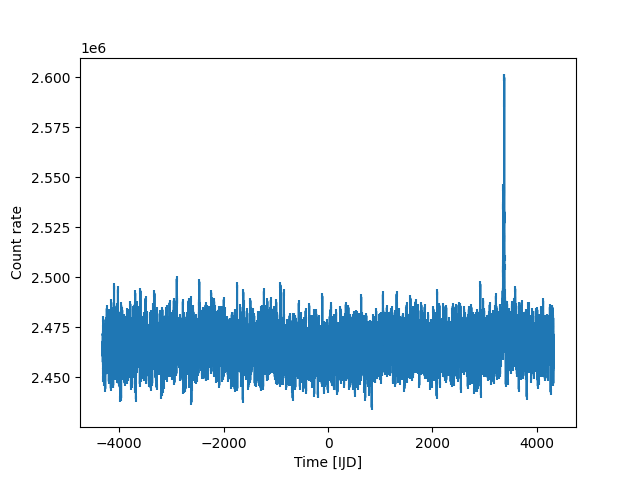

Text(0, 0.5, 'Count rate')

In [7]:
plt.errorbar(lc.data_unit[1].data['TIME'], lc.data_unit[1].data['RATE'], yerr=lc.data_unit[1].data['ERROR'])
plt.xlabel('Time [IJD]')
plt.ylabel('Count rate')

## Make another query

First look at the keys

In [9]:
descr = disp.get_product_description(instrument='isgri',product_name='isgri_spectrum')

--------------
parameters for product isgri_spectrum and instrument isgri
unable to dig list, instance not a dict by <class 'list'>; object was [{'query_name': 'src_query'}, {'name': 'src_name', 'units': 'str', 'value': 'test'}, {'name': 'RA', 'units': 'deg', 'value': 0.0}, {'name': 'DEC', 'units': 'deg', 'value': 0.0}, {'name': 'T1', 'units': None, 'value': '2001-12-11T00:00:00.000'}, {'name': 'T2', 'units': None, 'value': '2001-12-11T00:00:00.000'}, {'name': 'token', 'units': 'str', 'value': None}]

--------------
query_name: src_query
 name: src_name,  value: test,  units: str, 
 name: RA,  value: 0.0,  units: deg, 
 name: DEC,  value: 0.0,  units: deg, 
 name: T1,  value: 2001-12-11T00:00:00.000,  units: None, 
 name: T2,  value: 2001-12-11T00:00:00.000,  units: None, 
 name: token,  value: None,  units: str, 
unable to dig list, instance not a dict by <class 'list'>; object was [{'query_name': 'isgri_parameters'}, {'name': 'user_catalog', 'units': 'str', 'value': None}, {'name': '

### Extract an image on a limited number of pointigs
with the parameter max_pointings, we can get a random subset of available pointings
The most common use case is an image from which we want to derive the 
catalog of bright sources in the field of view

Note that we are giving the parameters as arguments.

In [10]:
image = disp.get_product(instrument="isgri", 
                     product="isgri_image", 
                     product_type="Real", 
                     osa_version='OSA11.0',
                     radius = 8,
                     RA=275.09142677,
                     DEC=7.18535523,
                     T1=58193.455,
                     T2=58246.892,
                     T_format= 'mjd',
                     max_pointings=10,
                     E1_keV=30.0,
                     E2_keV=80.0,
                     token=token
          )

dig_list unable to literal_eval src_name; problem malformed node or string: <_ast.Name object at 0x7fb968e61c40>
dig_list unable to literal_eval RA; problem malformed node or string: <_ast.Name object at 0x7fb968e6af70>
dig_list unable to literal_eval DEC; problem malformed node or string: <_ast.Name object at 0x7fb968e83f10>
dig_list unable to literal_eval T1; problem malformed node or string: <_ast.Name object at 0x7fb968e83f70>
dig_list unable to literal_eval T2; problem malformed node or string: <_ast.Name object at 0x7fb968e83f40>
dig_list unable to literal_eval token; problem malformed node or string: <_ast.Name object at 0x7fb968e8d070>
dig_list unable to literal_eval scw_list; problem malformed node or string: <_ast.Name object at 0x7fb968e8d520>
dig_list unable to literal_eval selected_catalog; problem malformed node or string: <_ast.Name object at 0x7fb968e83280>
dig_list unable to literal_eval radius; problem malformed node or string: <_ast.Name object at 0x7fb968e83f10>
dig

In [11]:
#Let's look at the image
image.show()

ID=0 prod_name=mosaic_image_0_mosaic  meta_data: {'product': 'mosaic', 'instrument': 'isgri', 'src_name': '', 'query_parameters': '[{"query_name": "isgri_image_query"}, {"product_name": "isgri_image_query"}, {"name": "detection_threshold", "units": "sigma", "value": 0.0}, {"name": "image_scale_min", "units": None, "value": None}, {"name": "image_scale_max", "units": None, "value": None}]'}

ID=1 prod_name=dispatcher_catalog_1  meta_data: 



In [12]:
#access it as an attribute
image.mosaic_image_0_mosaic

In [13]:
#Access it as liste memebr
data_collection._p_list[0]

In [14]:
#Minimum detection threshold and avoid including new sources
det_sigma = 8
include_new_sources = False

sources = image.dispatcher_catalog_1.table[image.dispatcher_catalog_1.table['significance'] >= det_sigma]

if len(sources) == 0:
    print('No sources in the catalog with det_sigma > %.1f' % det_sigma)
    

if not include_new_sources:
    ind = [not 'NEW' in ss for ss in sources['src_names']]
    clean_sources = sources[ind]
else:
    clean_sources = sources

#We copy back clean sources in the image data products
image.dispatcher_catalog_1.table = clean_sources

#We derive the catalog string for the spectrum !
api_cat_str=image.dispatcher_catalog_1.get_api_dictionary()

api_cat_str

'{"cat_frame": "fk5", "cat_coord_units": "deg", "cat_column_list": [[17, 87], ["GRS 1915+105", "MAXI J1820+070"], [29.396455764770508, 1803.1607666015625], [288.799560546875, 275.0911865234375], [10.939922332763672, 7.185144901275635], [-32768, -32768], [2, 2], [0, 0], [0.0002800000074785203, 0.00041666667675599456]], "cat_column_names": ["meta_ID", "src_names", "significance", "ra", "dec", "NEW_SOURCE", "ISGRI_FLAG", "FLAG", "ERR_RAD"], "cat_column_descr": [["meta_ID", "<i8"], ["src_names", "<U20"], ["significance", "<f8"], ["ra", "<f8"], ["dec", "<f8"], ["NEW_SOURCE", "<i8"], ["ISGRI_FLAG", "<i8"], ["FLAG", "<i8"], ["ERR_RAD", "|O"]], "cat_lat_name": "dec", "cat_lon_name": "ra"}'

### Query a spectrum with the maximum number of available science windows

The maximum number of science windows that can be processed in a single query is 500, 
you should specify this in max_pointings. Otherwise the default value of 50 will be used.

Once the query is submitted, you will receive an email. You can now interrupt your query and wait for a second email when data will be ready.

In [15]:
#We get a spectrum from all pointings
spectrum = disp.get_product(instrument="isgri", 
                 product="isgri_spectrum", 
                 product_type="Real", 
                 osa_version='OSA11.0',
                     RA=275.09142677,
                         DEC=7.18535523,
                    radius = 8,
                     T1=58193.455,
                         T2=58246.892,
                         T_format= 'mjd',
                     max_pointings=50,
                     token=token,
                 selected_catalog=api_cat_str)

dig_list unable to literal_eval src_name; problem malformed node or string: <_ast.Name object at 0x7fb968e6a3a0>
dig_list unable to literal_eval RA; problem malformed node or string: <_ast.Name object at 0x7fb9675c1ac0>
dig_list unable to literal_eval DEC; problem malformed node or string: <_ast.Name object at 0x7fb9675c1280>
dig_list unable to literal_eval T1; problem malformed node or string: <_ast.Name object at 0x7fb9675c1e80>
dig_list unable to literal_eval T2; problem malformed node or string: <_ast.Name object at 0x7fb9675c1c10>
dig_list unable to literal_eval token; problem malformed node or string: <_ast.Name object at 0x7fb9675c1340>
dig_list unable to literal_eval scw_list; problem malformed node or string: <_ast.Name object at 0x7fb9675c1b50>
dig_list unable to literal_eval selected_catalog; problem malformed node or string: <_ast.Name object at 0x7fb9675c1d90>
dig_list unable to literal_eval radius; problem malformed node or string: <_ast.Name object at 0x7fb9675c15e0>
dig

In [16]:
#This is the source we inspect the spectrum for
src_name='MAXI J1820+070'

In [17]:
#We select a particulr source
data_sel=spectrum.new_from_metadata('src_name',src_name)
data_sel.show()

ID=0 prod_name=prod_0_MAXIJ1820+070_isgri_spectrum  meta_data: {'src_name': 'MAXI J1820+070', 'product': 'isgri_spectrum'}

ID=1 prod_name=prod_1_MAXIJ1820+070_isgri_arf  meta_data: {'src_name': 'MAXI J1820+070', 'product': 'isgri_arf'}

ID=2 prod_name=prod_2_MAXIJ1820+070_isgri_rmf  meta_data: {'src_name': 'MAXI J1820+070', 'product': 'isgri_rmf'}



In [18]:
#We can save the files
data_sel.save_all_data()